In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [ ]:
import cv2
import re
import pytesseract
import os
from pytesseract import Output
from IPython.display import Image, clear_output
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


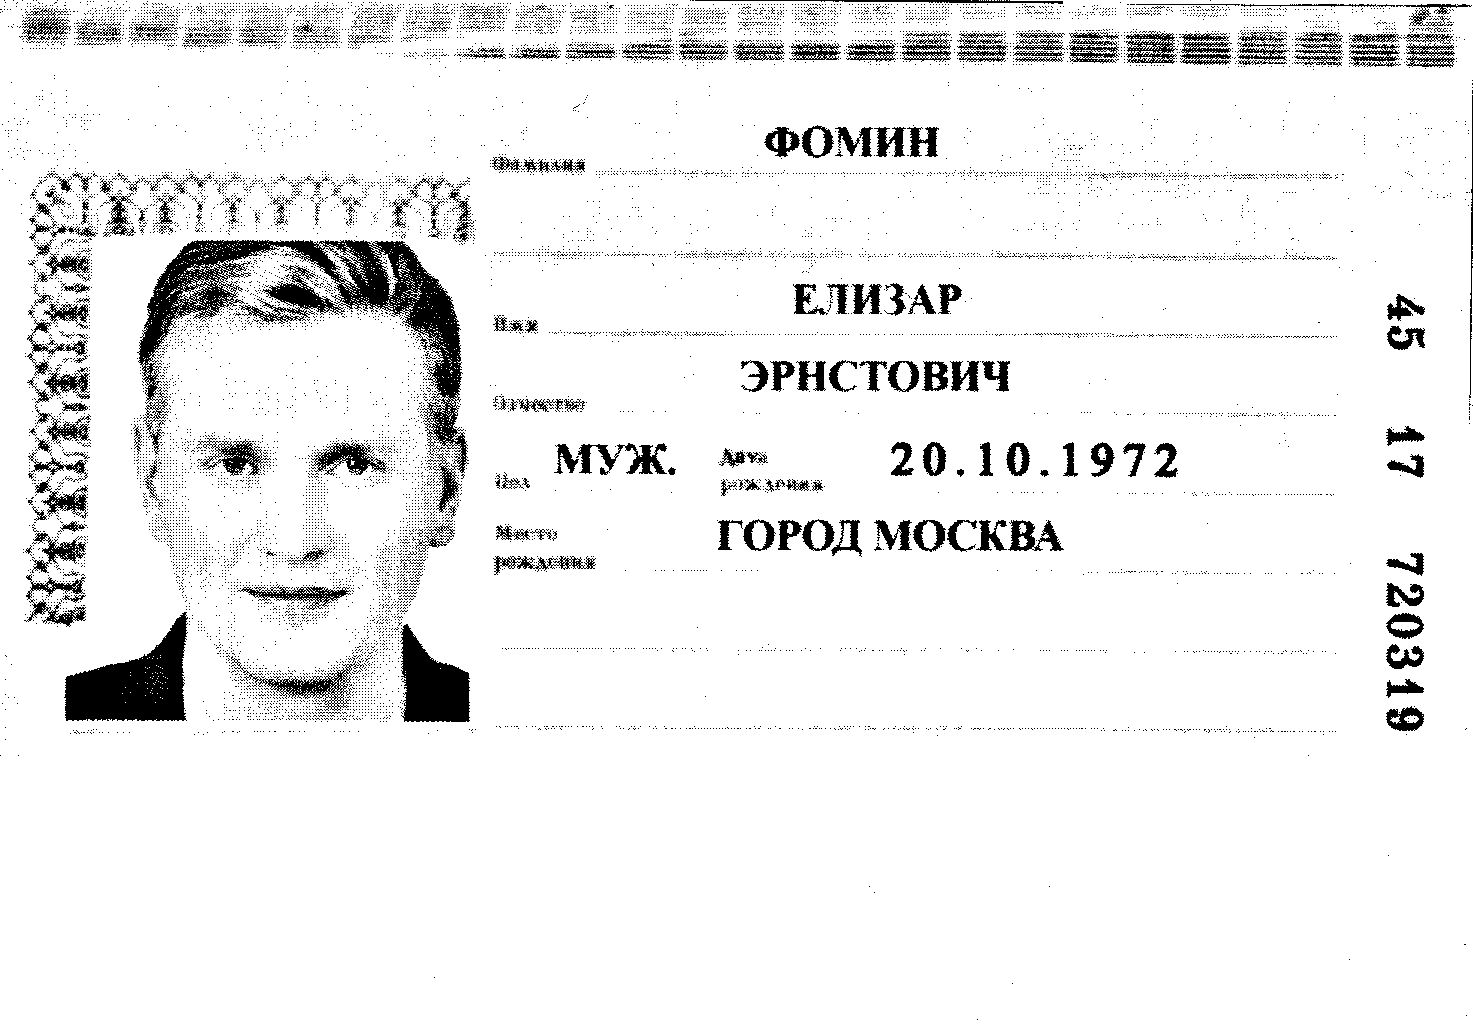

In [ ]:
img = cv2.imread("04.jpg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=150)

# otsu threshold
thresh = cv2.threshold(divide, 0, 300, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

cv2_imshow(morph)

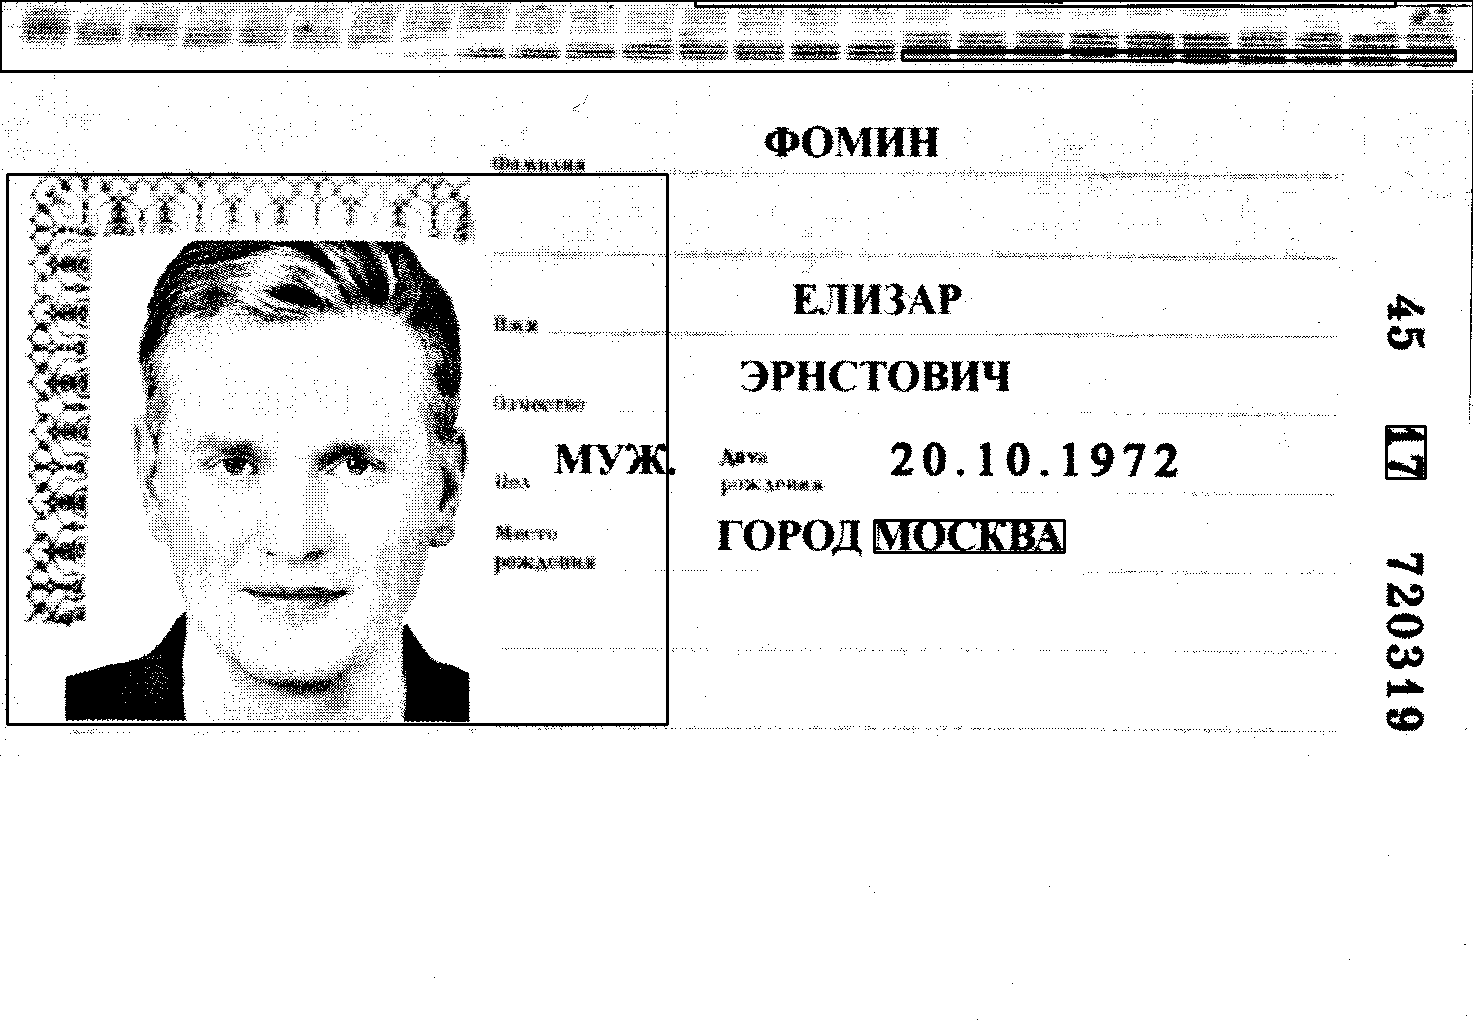

 

 

„ ФоМиН _

ЕЛИЗАР
ЭРНСТОВИЧ

м., 20.10.1972)

рожалная:

ГОРОД МОСКВА

 

 

 

5%

616061



In [ ]:
myconfig = r'-l rus  tessedit_char_whitelist=0123456789йцукенгшщзхъфывапролджэёячсмитьбюЙЦУКЕНГШЩЗХЪФЫВАПРОЛДЖЭЁЯЧСМИТЬБЮ tessedit_char_blacklist=\/_`|,<>:;{}[] --psm 6 --oem 3'
custom_config = r'--psm 6 --oem 3 '
img = morph
h, w = img.shape
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes=len(d['level'])

for i in range(n_boxes):
  if float(d['conf'][i])>40:
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    #morph= cv2.rectangle(morph, (int(d[1]), h - int(d[2])), (int(d[3]), h - int(d[4])), (0,255,0), 2)
    img= cv2.rectangle(img, (x,y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

print(pytesseract.image_to_string(img, config = myconfig))

Surname:
„ ФОМиН__.

 

Name:
ЕЛИЗАР

Dad's Name:
ЭРНСТОВИЧ |

Date of birth:
20.10.1972 —



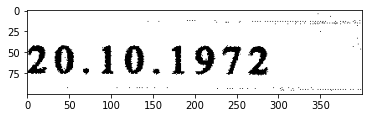

In [ ]:
stop=100
sright=700
sheight= 100
swidth=400
surname_image = morph[stop : (stop + sheight) , sright: (sright + swidth)]
plt.imshow(surname_image, cmap="gray")
print("Surname:")
print(pytesseract.image_to_string(surname_image, config = myconfig))

ntop = 200
nright = 700
nheight = 150
nwidth = 400
name_image = morph[ntop : (ntop + nheight) , nright: (nright + nwidth)]
plt.imshow(name_image, cmap="gray")
print("Name:")
print(pytesseract.image_to_string(name_image, config = myconfig))

otop = 330
oright = 700
oheight = 100
owidth = 400
dname_image = morph[otop : (otop + oheight) , oright: (oright + owidth)]
plt.imshow(dname_image, cmap="gray")
print("Dad's Name:")
print(pytesseract.image_to_string(dname_image, config = myconfig))

bdtop = 400
bdright = 890
bdheight = 100
bdwidth = 400
date_of_birth_image = morph[bdtop : (bdtop+ bdheight) , bdright: (bdright + bdwidth)]
plt.imshow(date_of_birth_image, cmap="gray")
print("Date of birth:")
print(pytesseract.image_to_string(date_of_birth_image, config = myconfig))

